In [43]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [44]:
def CFA(mask, shape):
    return np.dstack([
        np.tile(mask[:, :, channel], np.asarray(shape) // len(mask[:, :, channel]))
        for channel in range(mask.shape[-1])
    ])

In [45]:
bayer = np.array([
    [[0, 1], [0, 0]],
    [[1, 0], [0, 1]],
    [[0, 0], [1, 0]]
], dtype=np.uint8)

bayer = np.transpose(bayer, axes=(1, 2, 0))
bayer.shape

(2, 2, 3)

In [46]:
img = plt.imread("pies2.png")
img = img[:, :, :3]
img.shape

(512, 512, 3)

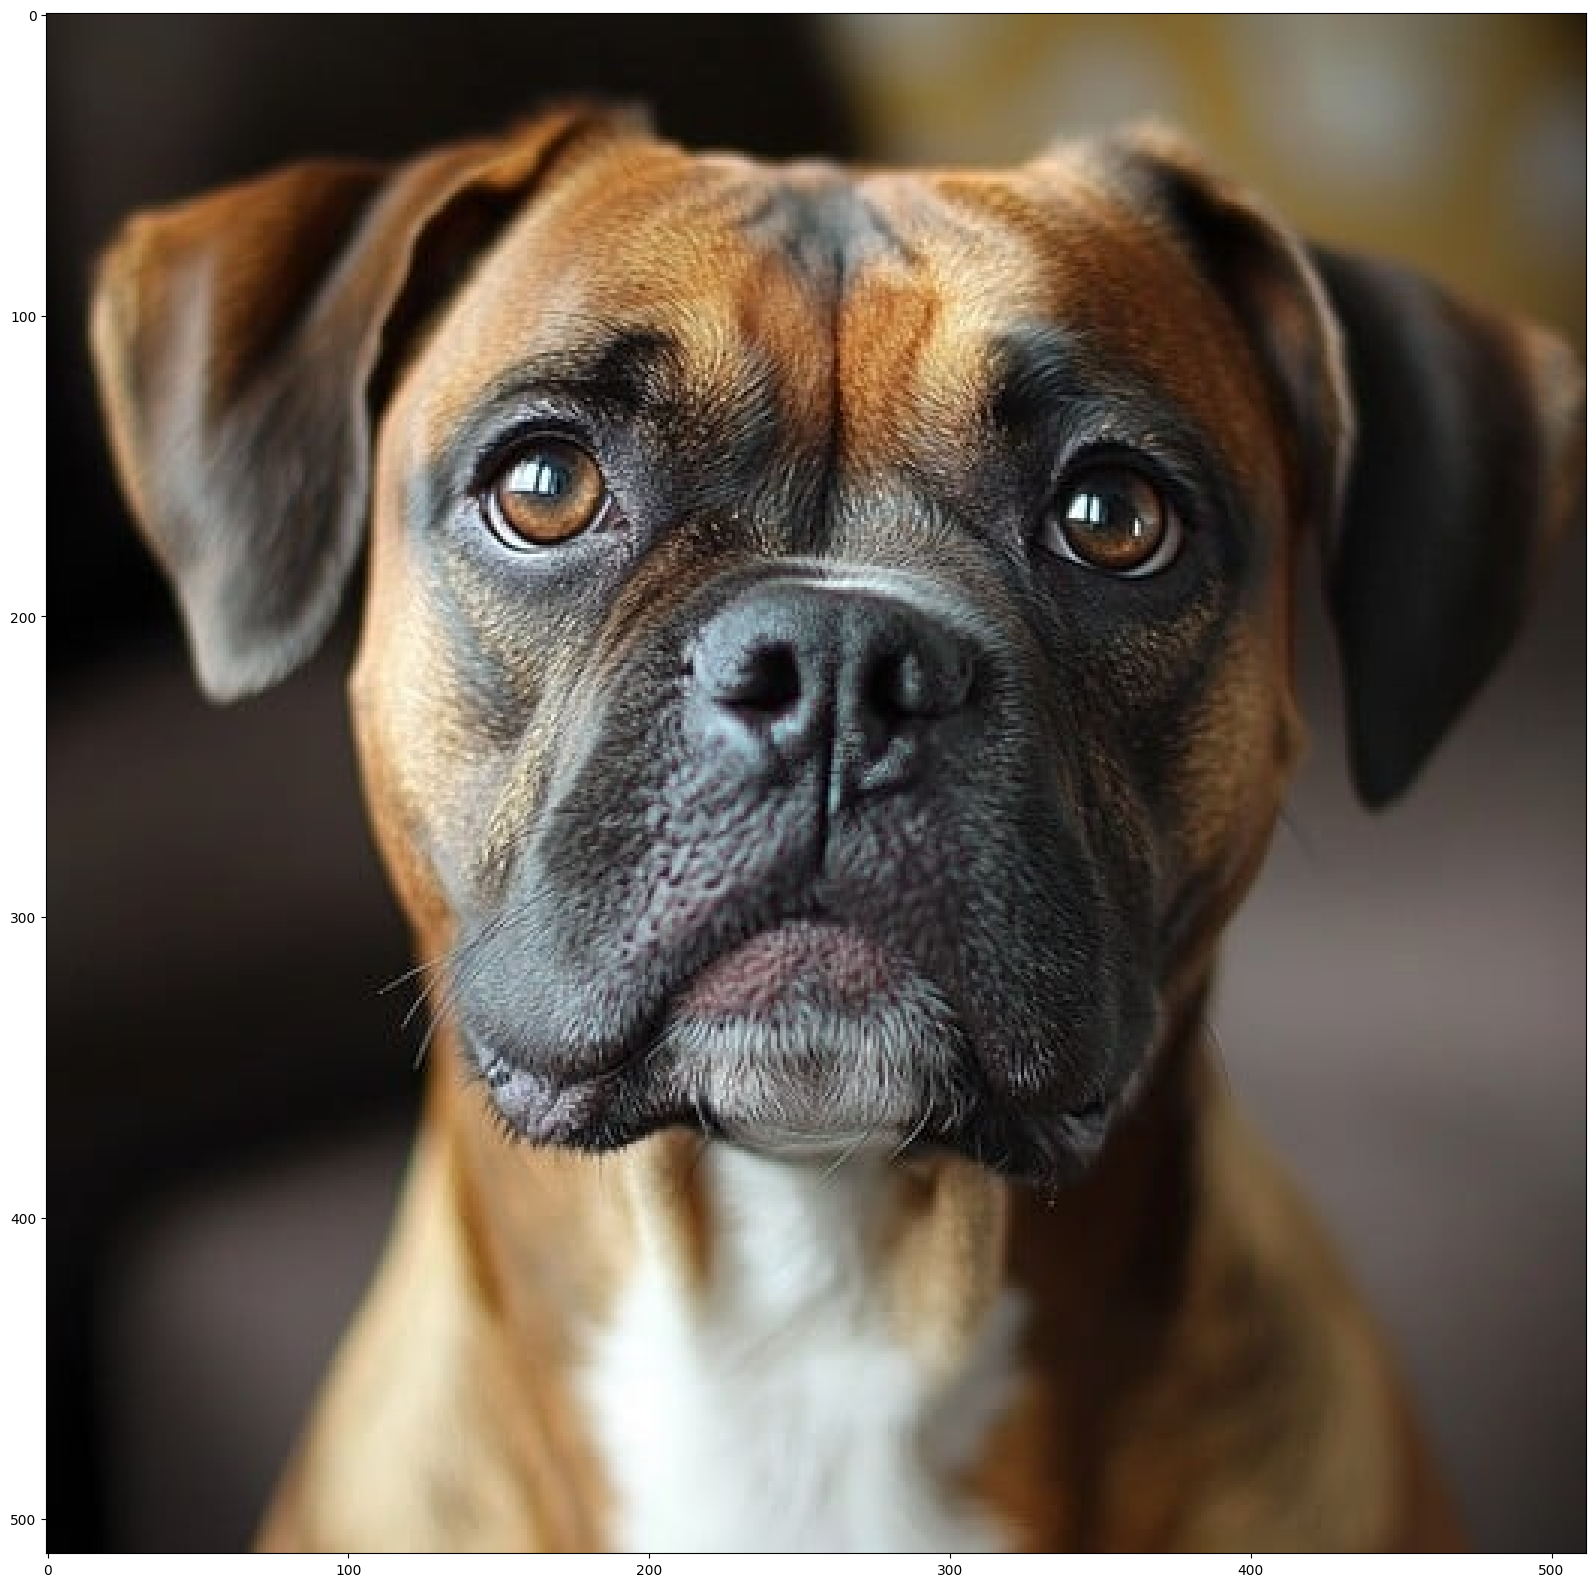

In [47]:
plt.figure(figsize=(20, 20))
plt.imshow(img)

plt.show()

In [48]:
img_bayer = CFA(bayer, np.array([img.shape[0], img.shape[1]]))
img_bayer.shape

(512, 512, 3)

In [49]:
h = min(img.shape[0], img_bayer.shape[0])
w = min(img.shape[1], img_bayer.shape[1])
sensor_image = img_bayer * img

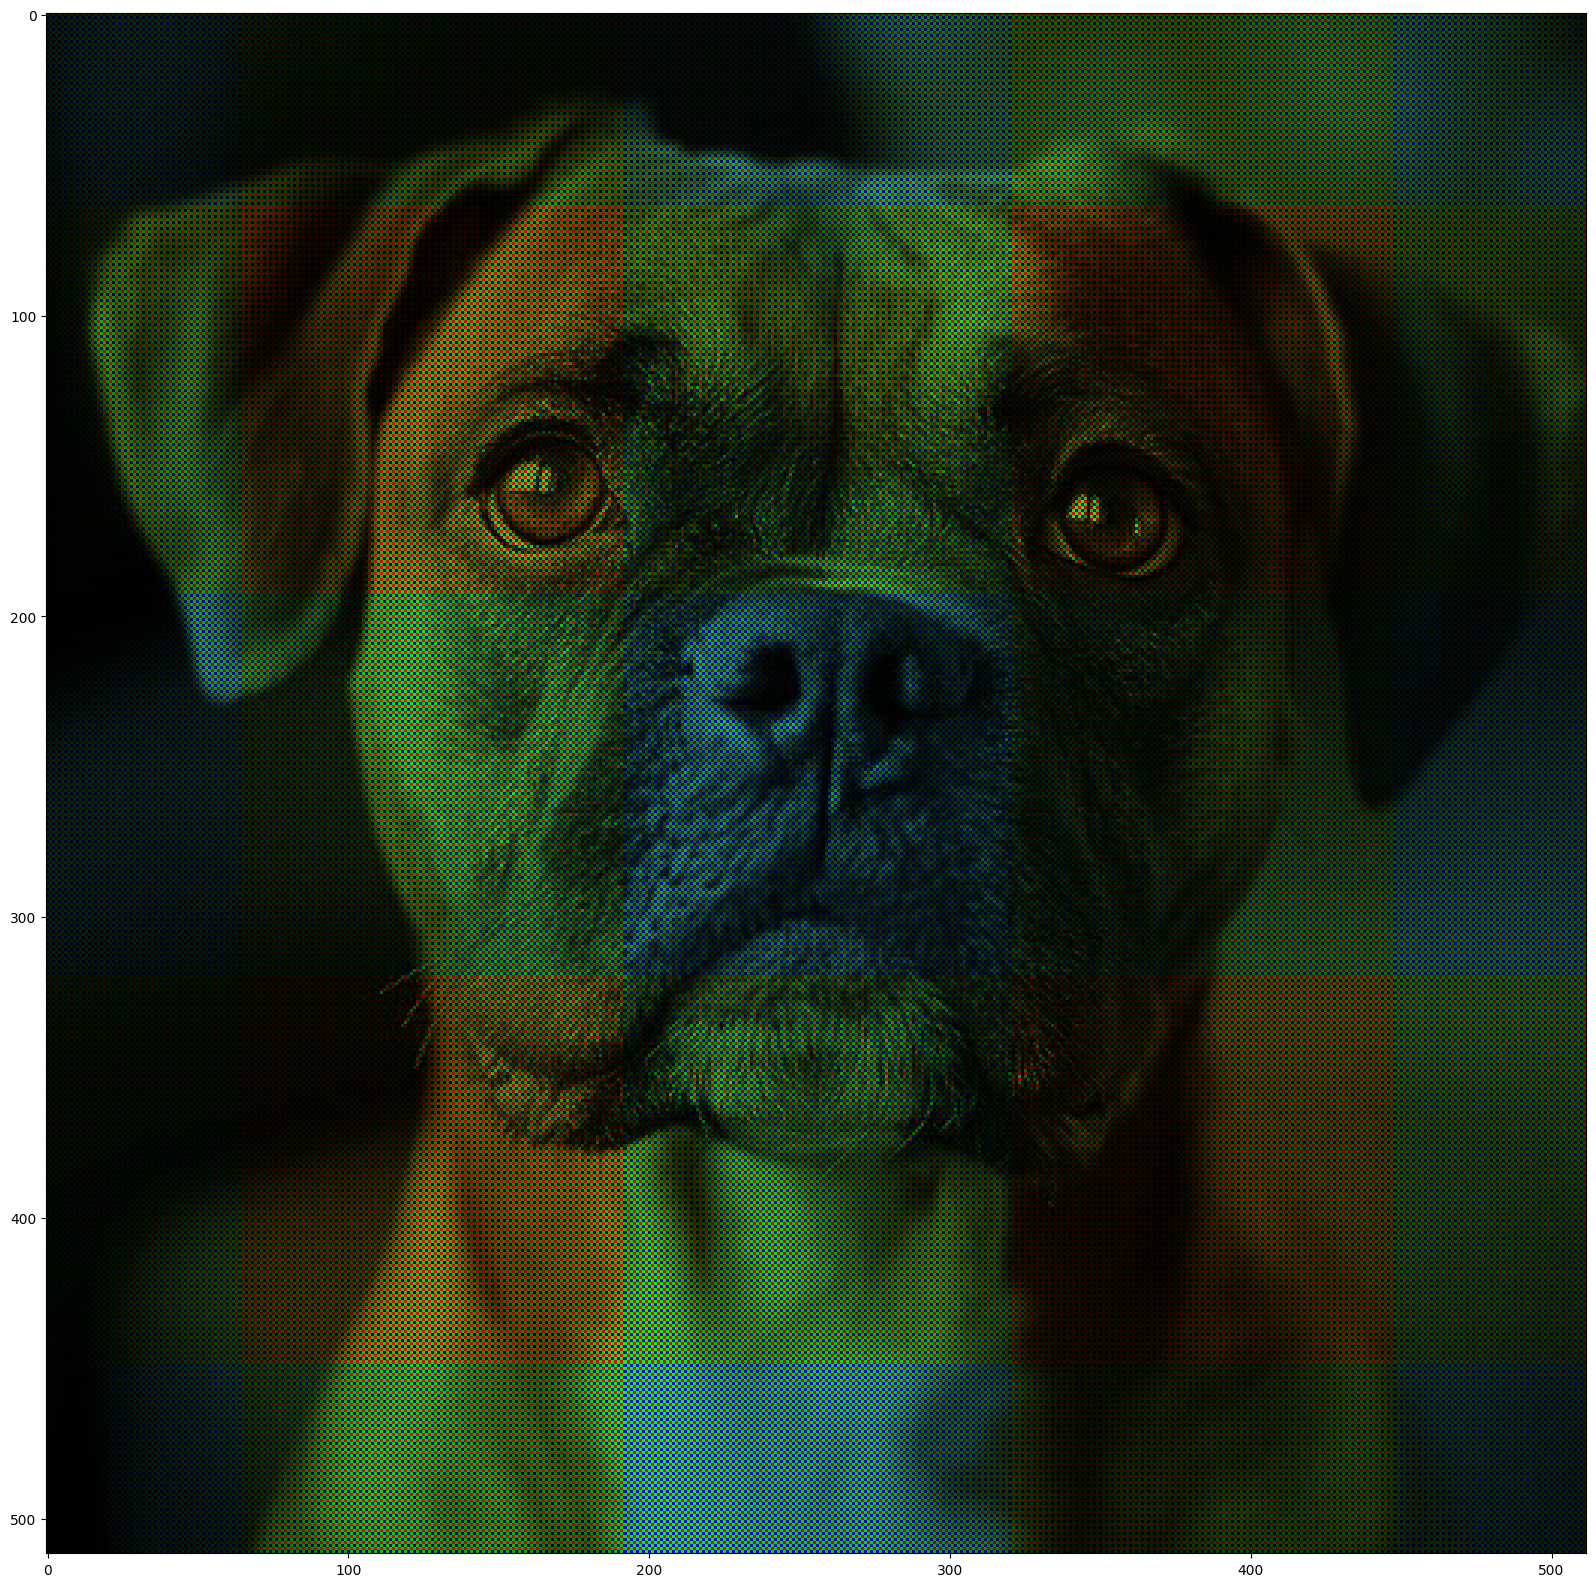

In [50]:
plt.figure(figsize=(20, 20))
plt.imshow(sensor_image)
plt.show()

In [51]:
demozaikowanie = np.dstack([
    np.ones([2, 2]),
    0.5 * np.ones([2, 2]),
    np.ones([2, 2]),
])

In [52]:
reconstructed_image = np.dstack([
    ndimage.convolve(sensor_image[:, :, channel], demozaikowanie[:, :, channel], mode="constant", cval=0.0) for channel in range(3)
])

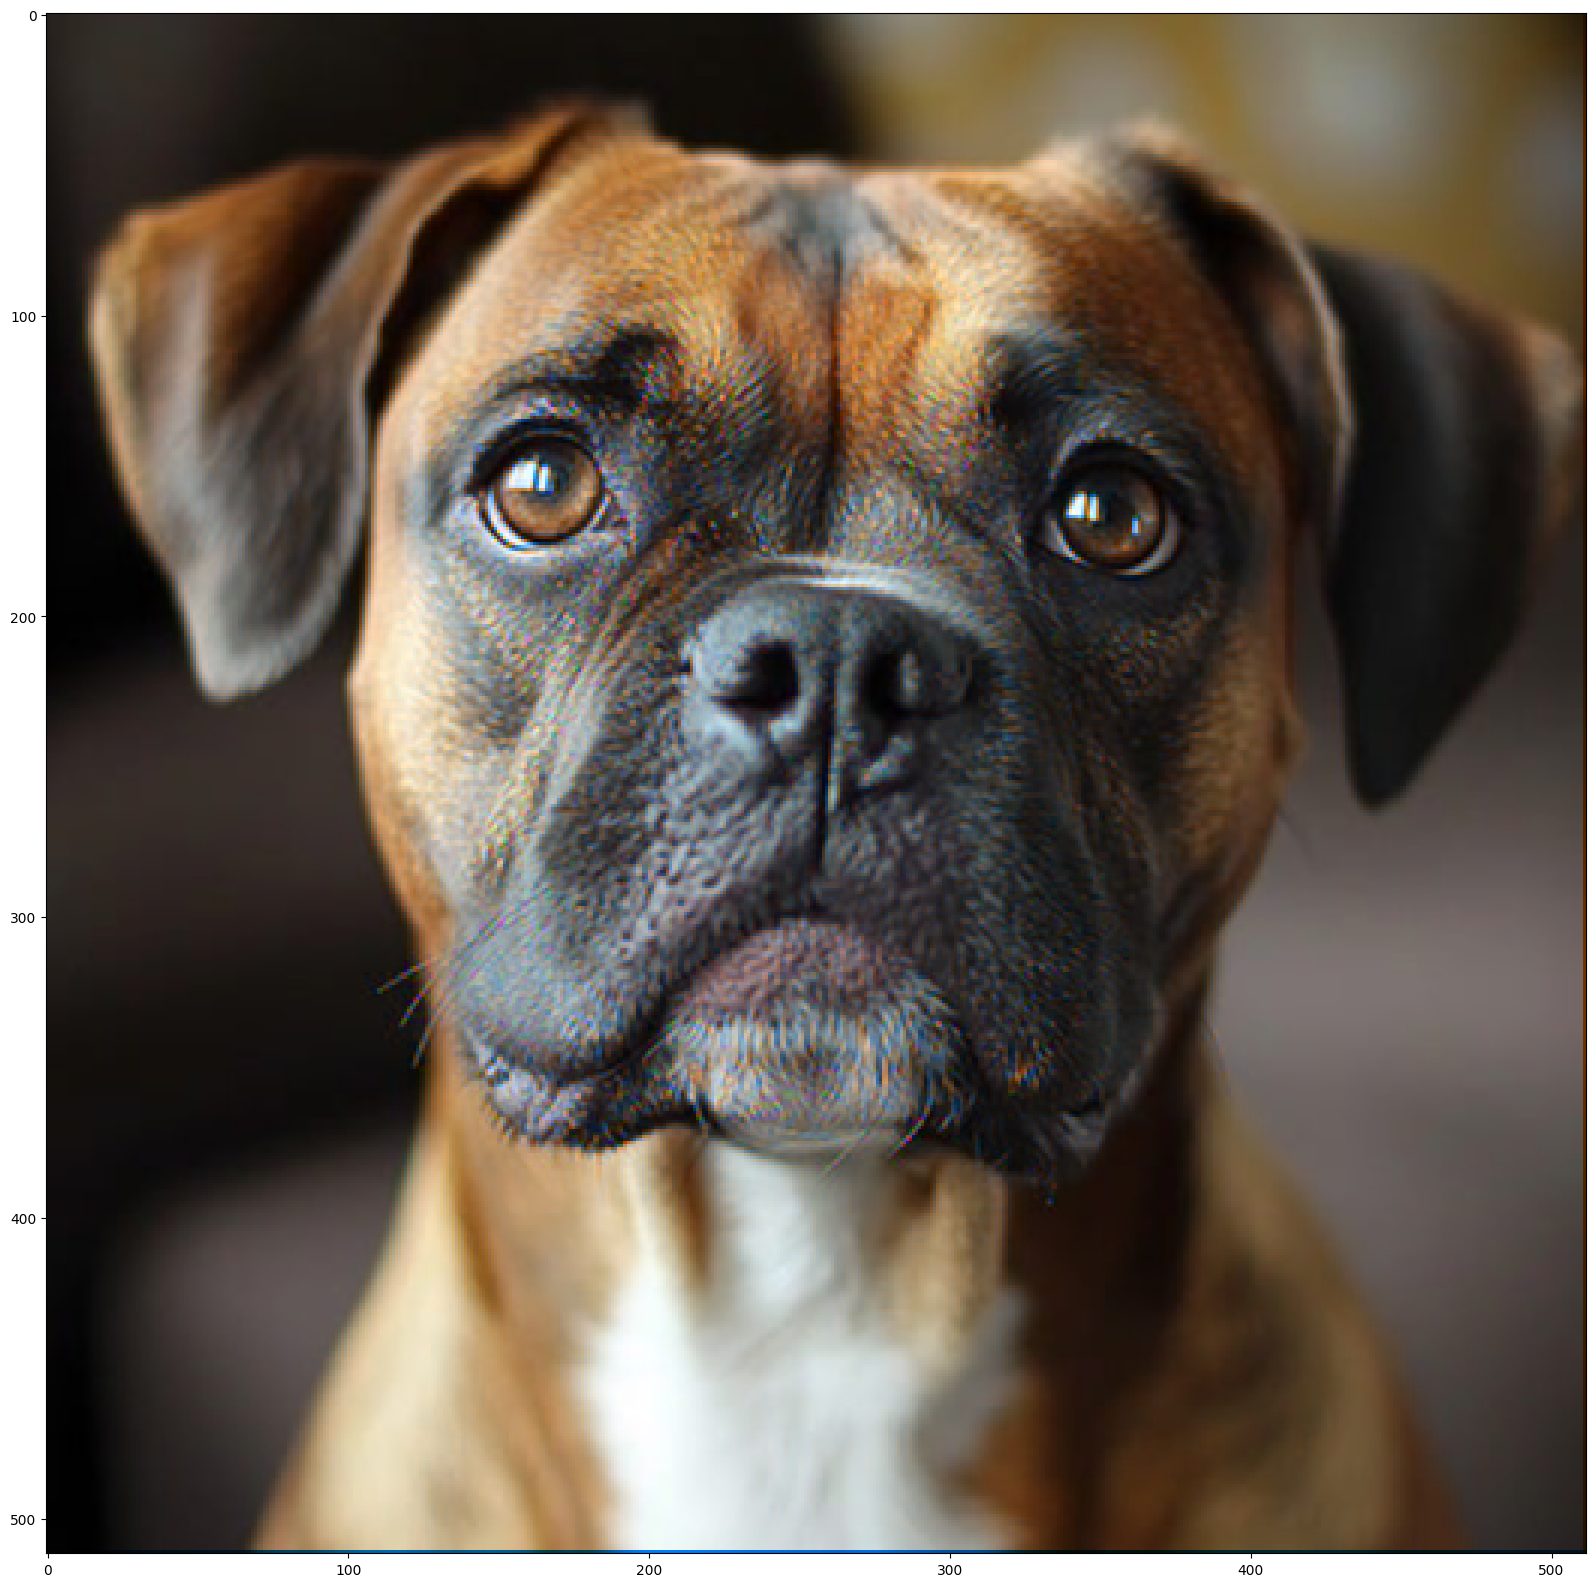

In [53]:
plt.figure(figsize=(20, 20))
plt.imshow(reconstructed_image)
plt.show()